# API Data Extraction for Financial Analysis

1. [What is API Data Extraction](#what-is-api-data-extraction)

2. [How to Extract Data from MetaTrader](#how-to-extract-data-from-metatrader)

3. [How to Extract Data from yfinance](#how-to-extract-data-from-yfinance)

4. [How to Extract Data from Alpaca API](#how-to-extract-data-from-alpaca-api)

5. [Types of Financial Data Available via APIs](#types-of-financial-data-available-via-apis)

6. [Data Quality and Bias Considerations](#data-quality-and-bias-considerations)

7. [Data Handling and Preprocessing](#data-handling-and-preprocessing)

8. [Summary and Best Practices](#summary-and-best-practices)


*EN DESARROLLO* 

I will be putting information and examples while I develope my differents strategies

## What is API Data Extraction

It is the process of automatically retrieving data from external platforms or services through an API (Application Programming Interface), allowing access to financial information without manual downloads.
s.

---

# Download Data

Data can be downloaded from sources such as Yahoo Finance, Polygon, Metatrader...

---

1. **MetaTrader**  

 **Libraries**

In [1]:
# ===========================================
# Import required libraries
# ===========================================

import pandas as pd  # For data manipulation and analysis (install: pip install pandas)
import numpy as np  # For numerical operations (install: pip install numpy)
import MetaTrader5 as mt5  # MT5 API to interact with the MetaTrader 5 terminal (install: pip install MetaTrader5)
from datetime import datetime  # To work with date/time ranges
import os  # For accessing environment variables
from dotenv import load_dotenv  # To load sensitive data (login, password) from .env file (install: pip install python-dotenv)
import matplotlib.pyplot as plt  # For visualization (install: pip install matplotlib)

 **Log in**  

In [2]:
# ===========================================
# Load environment variables from .env file
# ===========================================
# Create a .env file in the same folder and include:
# MT5_LOGIN=12345678
# MT5_PWD=your_password
# This helps protect your credentials.
load_dotenv()

MT5_LOGIN = os.getenv('MT5_LOGIN')
MT5_PWD = os.getenv('MT5_PWD')

# ===========================================
# Initialize and connect to MetaTrader 5
# ===========================================
mt5.initialize()

# Log in to your MT5 account (make sure MetaTrader 5 is running and connected)
# Replace 'MetaQuotes-Demo' with your broker's server if needed
mt5.login(int(MT5_LOGIN), MT5_PWD, 'MetaQuotes-Demo')


True

**Available assets**

In [3]:
symbols = mt5.symbols_get()

nsymbols = 50
print(f"Total symbols found: {len(symbols)}")
for s in symbols[:nsymbols]:  # Print first 50 symbols
    print(s.name, "-", s.description)


#You can implement a search function to identify if it is avaible de asset you need

Total symbols found: 10707
AUDCAD - Australian Dollar vs Canadian Dollar
AUDCHF - Australian Dollar vs Swiss Franc
AUDDKK - Australian Dollar vs Danish Krona
AUDHKD - Australian Dollar vs Hong Kong Dollar
AUDHUF - Australian Dollar vs Hungarian Florint
AUDJPY - Australian Dollar vs Yen
AUDNOK - Australian Dollar vs Norwegian Krona
AUDNZD - Australian Dollar vs New Zealand Dollar
AUDPLN - Australian Dollar vs Zloty
AUDSEK - Australian Dollar vs Sweden Krona
AUDSGD - Australian Dollar vs Singapore Dollar
AUDTHB - Australian Dollar vs Thai Baht
AUDUSD - Australian Dollar vs US Dollar
AUDZAR - Australian Dollar vs South African Rand
CADCHF - Canadian Dollar vs Swiss Franc
CADDKK - Canadian Dollar vs Danish Krone
CADJPY - Canadian Dollar vs Yen
CADMXN - Canadian Dollar vs Mexican Peso
CADNOK - Canadian Dollar vs Norwegian Krona
CADPLN - Canadian Dollar vs Zloty
CADSEK - Canadian Dollar vs Swedish Krona
CADSGD - Canadian Dollar vs Singapore Dollar
CHFDKK - Swiss Franc vs Danish Krona
CHFHUF 

**Ticks & Bars**

In [4]:
# ===========================================
# Define time range for data request
# ===========================================
from_date = datetime(2022, 1, 5)
to_date = datetime(2022, 1, 6)

# ===========================================
# Request tick data for a specific symbol (EURUSD)
# ===========================================
# You can choose COPY_TICKS_ALL, COPY_TICKS_TRADE, or COPY_TICKS_INFO
# COPY_TICKS_ALL returns both Bid and Ask ticks
ticks = mt5.copy_ticks_range("EURUSD", from_date, to_date, mt5.COPY_TICKS_ALL)

# ===========================================
# Create a pandas DataFrame to analyze the data
# ===========================================
data = pd.DataFrame(ticks)

# Convert 'time' from UNIX timestamp to readable datetime format
data['time'] = pd.to_datetime(data['time'], unit='s')

# Drop columns we don't need for now
data = data.drop(['last', 'volume', 'volume_real'], axis=1)

# Decode the 'flags' column (bitmask showing tick type: bid, ask, trade)
# Each flag is represented as an 8-bit binary string
data['flags'] = data['flags'].apply(lambda x: bin(x)[2:].zfill(8))

# Display the first few rows
print(data.head())

# ===========================================
# Example: How to request OHLC bars instead of ticks
# ===========================================
# Request 100 1-minute bars of EURUSD starting from a specific date:
bars = mt5.copy_rates_from("EURUSD", mt5.TIMEFRAME_M1, datetime(2022, 1, 5), 100)

# Convert to DataFrame and format time
bars_df = pd.DataFrame(bars)
bars_df['time'] = pd.to_datetime(bars_df['time'], unit='s')

print(bars_df.head())

mt5.shutdown()

# ===========================================
# 📘 More info and documentation:
# Official MetaTrader 5 Python API docs:
# https://www.mql5.com/en/docs/python_metatrader5
# ===========================================

                 time      bid      ask       time_msc     flags
0 2022-01-04 23:00:00  1.12847  1.12848  1641337200067  10000010
1 2022-01-04 23:00:00  1.12845  1.12846  1641337200772  10000110
2 2022-01-04 23:00:00  1.12842  1.12843  1641337200907  10000110
3 2022-01-04 23:00:01  1.12842  1.12847  1641337201109  00000100
4 2022-01-04 23:00:01  1.12843  1.12848  1641337201733  10000110
                 time     open     high      low    close  tick_volume  \
0 2022-01-04 21:21:00  1.12865  1.12874  1.12864  1.12869           22   
1 2022-01-04 21:22:00  1.12872  1.12890  1.12872  1.12890           16   
2 2022-01-04 21:23:00  1.12890  1.12899  1.12885  1.12894           43   
3 2022-01-04 21:24:00  1.12894  1.12900  1.12894  1.12899           28   
4 2022-01-04 21:25:00  1.12899  1.12905  1.12898  1.12899           32   

   spread  real_volume  
0       1            0  
1       1            0  
2       1            0  
3       1            0  
4       1            0  


True

2. **Yahoo Finance**  




 **Libraries**

In [5]:
# ===========================================
#  Import required libraries
# ===========================================
import pandas as pd  # For data manipulation (install: pip install pandas)
import yfinance as yf  # Yahoo Finance API wrapper (install: pip install yfinance)
from datetime import datetime, timedelta  # To work with time ranges
from yahooquery import search  # For searching assets (install: pip install yahooquery)
import os  # To interact with the file system
import matplotlib.pyplot as plt  # For visualization (install: pip install matplotlib)
import json #For data manipulation


 **Search Assets**

In [6]:
# ===========================================
# 🔍 1. Search for a ticker symbol
# ===========================================
query = "Tesla"  # Replace with any asset name, e.g., "Apple", "Bitcoin", etc.

# Use yahooquery to search for the asset
results = search(query)
# Convert in a list

tickers = []

for quote in results["quotes"]:
    tickers.append(quote["symbol"])

print(tickers)

['TSLA', 'TL0.F', 'TL0.DE', 'YTSL.NE', 'TESLAI-USD', 'TSLA.NE', '0R0X.IL']


**Ticks & Bars**

In [7]:
# ===========================================
# ⏬ 3. Download intraday price data
# ===========================================
# You can modify 'interval' and 'period' as needed
# Available intervals: '1m', '2m', '5m', '15m', '1h', '1d', etc.
# Available periods: '1d', '5d', '1mo', '6mo', '1y', etc.

# Two ways to download information
# Download grouped data for all S&P 500 tickers

data = yf.download(
    tickers= tickers,
    interval='1h',
    period='1d',
    group_by='ticker',
    progress=True,
    threads=True  # Enable multi-threading for faster downloading
)


# Example: Download SPY data separately (for comparison or benchmarking)
spy = yf.download("SPY", interval='1m', period='1d')


data.head()
#spy.head()

# ===========================================
# 🧠 Tips for further generalization
# ===========================================
# - You can adapt the script to download daily or weekly historical data
# - You could filter tickers by sector or industry if needed
# - Add error handling to skip failed downloads

# ===========================================
# 📘 Reference:
# yfinance documentation and GitHub:
# https://github.com/ranaroussi/yfinance
# ===========================================

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed

7 Failed downloads:
['0R0X.IL', 'YTSL.NE', 'TESLAI-USD', 'TSLA.NE', 'TL0.F', 'TSLA', 'TL0.DE']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SPY']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [(0R0X.IL, Open), (0R0X.IL, High), (0R0X.IL, Low), (0R0X.IL, Close), (0R0X.IL, Adj Close), (0R0X.IL, Volume), (YTSL.NE, Open), (YTSL.NE, High), (YTSL.NE, Low), (YTSL.NE, Close), (YTSL.NE, Adj Close), (YTSL.NE, Volume), (TESLAI-USD, Open), (TESLAI-USD, High), (TESLAI-USD, Low), (TESLAI-USD, Close), (TESLAI-USD, Adj Close), (TESLAI-USD, Volume), (TSLA.NE, Open), (TSLA.NE, High), (TSLA.NE, Low), (TSLA.NE, Close), (TSLA.NE, Adj Close), (TSLA.NE, Volume), (TL0.F, Open), (TL0.F, High), (TL0.F, Low), (TL0.F, Close), (TL0.F, Adj Close), (TL0.F, Volume), (TSLA, Open), (TSLA, High), (TSLA, Low), (TSLA, Close), (TSLA, Adj Close), (TSLA, Volume), (TL0.DE, Open), (TL0.DE, High), (TL0.DE, Low), (TL0.DE, Close), (TL0.DE, Adj Close), (TL0.DE, Volume)]
Index: []

[0 rows x 42 columns]

3. **Alpaca** 

---

 **Libraries**

In [8]:
# ===========================================
# Import required libraries
# ===========================================

import os  # Access to environment variables
from dotenv import load_dotenv  # Load .env file variables
from alpaca.data.historical import stock  # Historical market data
from alpaca.trading.client import TradingClient  # Trading account access
from alpaca.data.requests import StockBarsRequest  # Request format for stock bars
from alpaca.data.timeframe import TimeFrame  # Time interval definitions
from datetime import datetime, date, timedelta  # Date and time handling
from alpaca.trading.requests import GetAssetsRequest  # For asset filtering
from alpaca.trading.enums import AssetStatus  # Enum to filter by asset status
import pandas as pd  # Data manipulation and display

 **Log in**  

In [9]:
# Load environment variables from the .env file
load_dotenv()

# Get the API keys from the environment variables
api_key = os.getenv('ALPACA_KEY')
api_secret = os.getenv('ALPACA_SECRET')

# If API keys are not found, raise an error
if not api_key or not api_secret:
    raise EnvironmentError("Alpaca API environment variables are not set.")

# Alpaca API instance
api = stock.StockHistoricalDataClient(api_key=api_key, secret_key=api_secret)

# Instance client
client = TradingClient(api_key, api_secret, paper=True)

 **Search Assets**

In [10]:

# Create asset request (e.g. only active assets)
request = GetAssetsRequest(status=AssetStatus.ACTIVE)

# Get list of assets
assets = client.get_all_assets(request)

# Number of assests
print(len(assets))

# Display first few assets
for asset in assets[:5]:
    print(asset.symbol, asset.name)

# Search for a specific asset by its symbol
symbol = "AAPL"
asset = client.get_asset(symbol)

# Display basic info
print(f"Symbol: {asset.symbol}")
print(f"Name: {asset.name}")
print(f"Exchange: {asset.exchange}")
print(f"Tradable: {asset.tradable}")

12352
NVAC NorthView Acquisition Corporation Common Stock
EGLXF Enthusiast Gaming Holdings Inc.
IMPUY Impala Platinum Holdings Ltd Sponsored ADR (South Africa)
RNLXY RENALYTIX PLC American Depositary Shares - Sponsored
BETSF BIT BRO LTD Ordinary Shares
Symbol: AAPL
Name: Apple Inc. Common Stock
Exchange: AssetExchange.NASDAQ
Tradable: True


**Ticks & Bars**

In [11]:

# Define the ticker (e.g., 'AAPL' for Apple)
ticker = "AAPL"  # You can change this to the ticker of your preference
interval = "day"  # Time interval (can be 'minute', 'hour', 'day', 'week', 'month')
days = 30  # Number of historical days to fetch

# Assign the time interval based on the provided value
if interval == "minute":
    timeframe = TimeFrame.Minute
elif interval == "hour":
    timeframe = TimeFrame.Hour
elif interval == "day":
    timeframe = TimeFrame.Day
elif interval == "week":
    timeframe = TimeFrame.Week
elif interval == "month":
    timeframe = TimeFrame.Month
else:
    raise ValueError("Invalid interval. It should be 'minute', 'hour', 'day', 'week', or 'month'.")

# Define the start date
start = date.today() - timedelta(days=days)

# Request historical data for the specific ticker
request = StockBarsRequest(
    symbol_or_symbols=ticker,
    timeframe=timeframe,
    start=start,
    sort="desc"
)


def convert_to_dataframe(data):
    """
    Converts a list of tuples into a Pandas DataFrame with separated columns and timestamp as index.

    Args:
    - data (list): List of tuples containing historical data.

    Returns:
    - pd.DataFrame: DataFrame with appropriate columns.
    """
    # Create a list of dictionaries, where each dictionary represents a row.
    data_dict = []
    for item in data:
        row = {}
        for i in item:
            # Unpack the tuples and assign them to corresponding columns
            key, value = i
            row[key] = value
        data_dict.append(row)
    
    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(data_dict)
    
    # Convert the timestamp to index and ensure it is in datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)
    
    return df

try:
    # Fetch historical data
    chart_resp = api.get_stock_bars(request)
    
    # Check if the response contains data
    if chart_resp:
        # chart_resp[ticker] is a list of tuples
        data = chart_resp[ticker]  # List of tuples for the symbol
        
        # Convert the list of tuples into a DataFrame
        df = convert_to_dataframe(data)
        
        # Display the DataFrame
        print(df)
    else:
        print(f"No data found for {ticker}")
except Exception as e:
    print(f"Error fetching data for {ticker}: {e}")





                          symbol     open      high       low   close  \
timestamp                                                               
2025-05-23 04:00:00+00:00   AAPL  193.665  197.7000  193.4600  195.27   
2025-05-22 04:00:00+00:00   AAPL  200.710  202.7500  199.7000  201.36   
2025-05-21 04:00:00+00:00   AAPL  205.170  207.0400  200.7100  202.09   
2025-05-20 04:00:00+00:00   AAPL  207.670  208.4700  205.0300  206.86   
2025-05-19 04:00:00+00:00   AAPL  207.910  209.4800  204.2600  208.78   
2025-05-16 04:00:00+00:00   AAPL  212.360  212.5700  209.7700  211.26   
2025-05-15 04:00:00+00:00   AAPL  210.950  212.9600  209.5400  211.45   
2025-05-14 04:00:00+00:00   AAPL  212.430  213.9400  210.5801  212.33   
2025-05-13 04:00:00+00:00   AAPL  210.430  213.4000  209.0000  212.93   
2025-05-12 04:00:00+00:00   AAPL  210.970  211.2679  206.7500  210.79   
2025-05-09 04:00:00+00:00   AAPL  199.000  200.5399  197.5350  198.53   
2025-05-08 04:00:00+00:00   AAPL  197.720  200.0500

## Types of Financial Data Available via APIs

APIs primarily provide access to **historical financial data**, which is essential for backtesting and analysis. This typically includes:

---

1. Historical price data (OHLCV – Open, High, Low, Close, Volume)

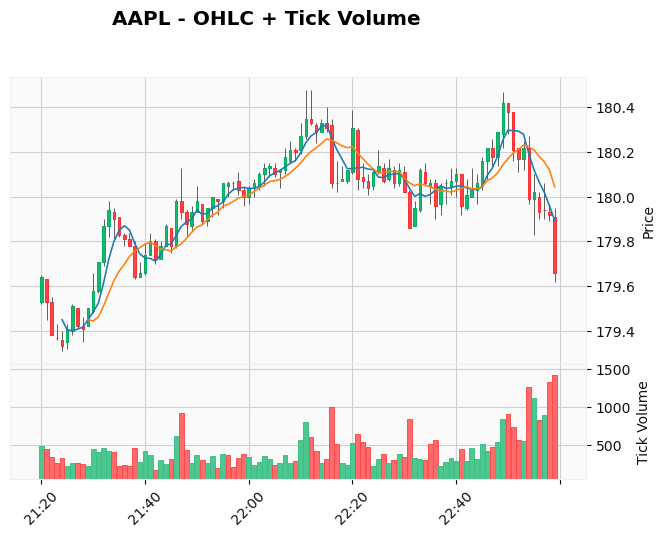

In [12]:
# Import the mplfinance library for plotting financial charts such as candlesticks, OHLC, and volume.
# It is especially useful for visualizing time series data in stock and crypto trading.
# Install via: pip install mplfinance
import mplfinance as mpf

load_dotenv()

MT5_LOGIN = os.getenv('MT5_LOGIN')
MT5_PWD = os.getenv('MT5_PWD')

# ===========================================
# Initialize and connect to MetaTrader 5
# ===========================================
mt5.initialize()

# Log in to your MT5 account (make sure MetaTrader 5 is running and connected)
# Replace 'MetaQuotes-Demo' with your broker's server if needed
mt5.login(int(MT5_LOGIN), MT5_PWD, 'MetaQuotes-Demo')


bars = mt5.copy_rates_from("AAPL", mt5.TIMEFRAME_M1, datetime(2022, 1, 5), 100)

# Convert to DataFrame and format time
bars_df = pd.DataFrame(bars)
bars_df['time'] = pd.to_datetime(bars_df['time'], unit='s')
bars_df.set_index('time', inplace=True)
bars_df.rename(columns={'tick_volume':'volume'},inplace=True)

mt5.shutdown()

# =========================
# Plot mplfinance
# =========================

# Crear gráfico con OHLC y tick_volume
mpf.plot(
    bars_df,
    type='candle',
    volume=True,
    title='AAPL - OHLC + Tick Volume',
    style='yahoo',
    mav=(5, 10),  # medias móviles opcionales
    ylabel='Price',
    ylabel_lower='Tick Volume'
)

2. Real-time or delayed market data (quotes, trades)

In [13]:
import os
import nest_asyncio
import asyncio
import csv
from datetime import datetime
from alpaca.data.live import StockDataStream

# Evita conflicto en notebooks
nest_asyncio.apply()

# Claves API desde variables de entorno
api_key = os.getenv('ALPACA_KEY')
api_secret = os.getenv('ALPACA_SECRET')

# Crear stream
stream = StockDataStream(api_key, api_secret)

# Ruta del archivo CSV
csv_file = "quotes.csv"

# Encabezados para el archivo
fieldnames = ["timestamp", "symbol", "bid_price", "ask_price"]

# Inicializar el archivo CSV (solo la primera vez)
with open(csv_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()

# Callback para cotizaciones
async def handle_quote(data):
    print(f"[{data.symbol}] Bid: {data.bid_price}, Ask: {data.ask_price}")

    # Guardar en el archivo
    with open(csv_file, mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writerow({
            "timestamp": datetime.now().isoformat(),
            "symbol": data.symbol,
            "bid_price": data.bid_price,
            "ask_price": data.ask_price
        })

# Suscribirse a AAPL
print(stream.subscribe_quotes(handle_quote, "AAPL"))

# Función para detener el stream
async def stop_after_delay(delay=10):
    await asyncio.sleep(delay)
    print(f"\n Stopping stream after {delay} seconds...\n")
    await stream.stop_ws()

# Ejecutar el stream y detener después de un tiempo
await asyncio.gather(
    stream._run_forever(),
    stop_after_delay(10)
)


None

 Stopping stream after 10 seconds...



[None, None]

In [14]:

"""
import os
from alpaca.data.live import StockDataStream
import nest_asyncio
import asyncio
from alpaca.data.enums import DataFeed

# Repara conflicto de asyncio en Jupyter
nest_asyncio.apply()

api_key = os.getenv('ALPACA_KEY')
api_secret = os.getenv('ALPACA_SECRET')

print(api_key)
print(api_secret)

# Crea el stream (usar paper=True si es cuenta demo)
stream = StockDataStream(api_key, api_secret,feed=DataFeed.IEX)

# Función de callback para procesar cotizaciones
async def handle_quote(data):
    print(f"[{data.symbol}] Bid: {data.bid_price}, Ask: {data.ask_price}")

# Suscribirse al símbolo
stream.subscribe_quotes(handle_quote, "AAPL")

# Ejecutar manualmente el loop si ya hay uno en marcha (como en Jupyter)
await stream._run_forever()
"""



'\nimport os\nfrom alpaca.data.live import StockDataStream\nimport nest_asyncio\nimport asyncio\nfrom alpaca.data.enums import DataFeed\n\n# Repara conflicto de asyncio en Jupyter\nnest_asyncio.apply()\n\napi_key = os.getenv(\'ALPACA_KEY\')\napi_secret = os.getenv(\'ALPACA_SECRET\')\n\nprint(api_key)\nprint(api_secret)\n\n# Crea el stream (usar paper=True si es cuenta demo)\nstream = StockDataStream(api_key, api_secret,feed=DataFeed.IEX)\n\n# Función de callback para procesar cotizaciones\nasync def handle_quote(data):\n    print(f"[{data.symbol}] Bid: {data.bid_price}, Ask: {data.ask_price}")\n\n# Suscribirse al símbolo\nstream.subscribe_quotes(handle_quote, "AAPL")\n\n# Ejecutar manualmente el loop si ya hay uno en marcha (como en Jupyter)\nawait stream._run_forever()\n'

3. Fundamental data (e.g., earnings, financial statements)

In [15]:
import nest_asyncio
nest_asyncio.apply()
import os
import asyncio
import websockets
import json
import csv
import time

API_KEY = os.getenv('ALPACA_KEY')
API_SECRET = os.getenv('ALPACA_SECRET') 

CSV_FILE = "btc_trades.csv"

async def connect():
    url = "wss://stream.data.alpaca.markets/v1beta3/crypto/us"
    async with websockets.connect(url) as ws:

        # Autenticación
        await ws.send(json.dumps({
            "action": "auth",
            "key": API_KEY,
            "secret": API_SECRET
        }))

        # Suscripción a trades BTC/USD
        await ws.send(json.dumps({
            "action": "subscribe",
            "trades": ["BTC/USD"]
        }))

        # Crear archivo CSV y escribir encabezado
        with open(CSV_FILE, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["timestamp", "symbol", "price", "size"])

            # Tiempo de ejecución
            start_time = time.time()
            duration = 10  # segundos

            while time.time() - start_time < duration:
                try:
                    message = await asyncio.wait_for(ws.recv(), timeout=duration)
                    data = json.loads(message)

                    # Verifica si hay datos de trades
                    if isinstance(data, list) and data and data[0].get("T") == "t":
                        for trade in data:
                            writer.writerow([
                                trade.get("t"),  # timestamp
                                trade.get("S"),  # symbol
                                trade.get("p"),  # price
                                trade.get("s")   # size
                            ])
                            print(f"Guardado: {trade}")
                except asyncio.TimeoutError:
                    print("Tiempo de espera agotado.")
                    break

# Ejecutar la función async con nest_asyncio para evitar error en Jupyter
asyncio.run(connect())


Tiempo de espera agotado.


In [ ]:

# Definir el ticker
ticker = yf.Ticker("AAPL")

# Obtener información fundamental
info = ticker.info

print(info['shortName'])          # Nombre corto de la empresa
print(info['sector'])             # Sector
print(info['trailingPE'])         # P/E ratio
print(info['dividendYield'])      # Rendimiento de dividendos
print(info['marketCap'])          # Capitalización de mercado

time.sleep(2) 

YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

: 

4. Technical indicators (e.g., moving averages, RSI)

In [ ]:
import ta  # pip install ta

# Historical data (daily for 1 year)
df = bars_df #apple data

# Calculate simple moving averages
df['MA20'] = df['close'].rolling(window=20).mean()    # 20-day simple moving average
df['MA50'] = df['close'].rolling(window=50).mean()    # 50-day simple moving average

# Calculate RSI using the ta library
df['RSI'] = ta.momentum.RSIIndicator(close=df['close'], window=14).rsi()

# Calculate MACD and signal line
macd = ta.trend.MACD(df['close'])
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()

# Calculate Bollinger Bands (upper and lower)
bb = ta.volatility.BollingerBands(df['close'])
df['BB_high'] = bb.bollinger_hband()
df['BB_low'] = bb.bollinger_lband()

# Display the last few rows with indicators
print(df.tail())


                       open    high     low   close  volume  spread  \
time                                                                  
2022-01-04 22:55:00  179.99  180.10  179.83  180.02    1119       0   
2022-01-04 22:56:00  180.00  180.02  179.90  179.93     826       0   
2022-01-04 22:57:00  179.94  180.06  179.90  179.94     890       0   
2022-01-04 22:58:00  179.93  179.97  179.89  179.92    1335       0   
2022-01-04 22:59:00  179.91  179.95  179.62  179.66    1428       0   

                     real_volume      MA20      MA50        RSI      MACD  \
time                                                                        
2022-01-04 22:55:00   2313720000  180.1280  180.1334  44.607008  0.014761   
2022-01-04 22:56:00   1591220000  180.1265  180.1296  41.023368 -0.003657   
2022-01-04 22:57:00   1794250000  180.1210  180.1248  41.584918 -0.017248   
2022-01-04 22:58:00   2411020000  180.1140  180.1190  40.749233 -0.029296   
2022-01-04 22:59:00   3548960000  180.09

5. Alternative data (e.g., news sentiment, social media activity)

In [ ]:
#EXAMPLE



Most APIs used in quantitative finance focus on **historical price series** for stocks, ETFs, forex, and cryptocurrencies.

---

## Data Quality and Bias Considerations

When working with financial data APIs, it's important to separate **data quality issues** from **modeling and bias-related treatments**. Below are two categories that highlight both aspects.

---

### A. Data Quality Issues

These concern the **accuracy, completeness, and consistency** of the raw data:

---

1. **Stock Splits**  
   If not adjusted, they can cause artificial price drops and mislead return calculations.  
   *Use APIs that provide adjusted historical prices or apply manual split adjustments.*


C:\Users\jango\AppData\Local\Temp\ipykernel_42888\611892554.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  IGE['close'] = IGE['close'].fillna(method='ffill').fillna(method='bfill')  # Fill NaNs


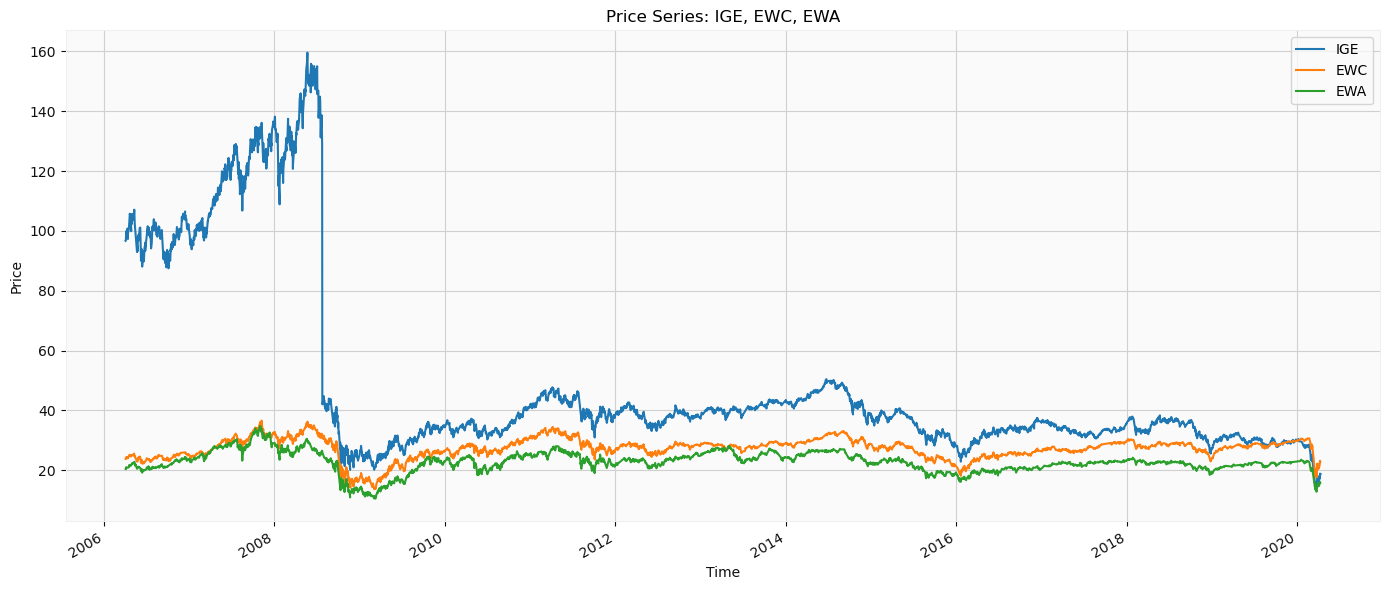

In 2009, the IGE investment fund underwent a stock split. This means that the number of shares in circulation increased, which affected its price, but not the total investment value. This split occurred specifically in May 2009.


In [ ]:


# Initialize and login to MT5
mt5.initialize()
mt5.login(int(MT5_LOGIN), MT5_PWD, 'MetaQuotes-Demo')

# Fetch IGE data
from_date = datetime(2006, 4, 4)
to_date = datetime(2020, 4, 9)
symbol1 = "EWC"
symbol2 = "EWA"
symbol3 = "IGE"
timeframe = mt5.TIMEFRAME_H1


# ===========================================
# Fetch historical data for each symbol
# ===========================================
bars_ewc = mt5.copy_rates_range(symbol1, timeframe, from_date, to_date)
bars_ewa = mt5.copy_rates_range(symbol2, timeframe, from_date, to_date)
bars_ige = mt5.copy_rates_range(symbol3, timeframe, from_date, to_date)


# Convert to DataFrames
ewc = pd.DataFrame(bars_ewc)
ewa = pd.DataFrame(bars_ewa)
IGE = pd.DataFrame(bars_ige)

# Process dates
ewc['time'] = pd.to_datetime(ewc['time'], unit='s')
ewa['time'] = pd.to_datetime(ewa['time'], unit='s')
IGE['time'] = pd.to_datetime(IGE['time'], unit='s')

# Set the index as time
ewc.set_index('time', inplace=True)
ewa.set_index('time', inplace=True)
IGE.set_index('time', inplace=True)
IGE.sort_index(inplace=True)
IGE['close'] = IGE['close'].fillna(method='ffill').fillna(method='bfill')  # Fill NaNs

mt5.shutdown()



# Get common dates between all three series
common_dates = IGE.index.intersection(ewc.index).intersection(ewa.index)
IGE = IGE.loc[common_dates]
ewc = ewc.loc[common_dates]
ewa = ewa.loc[common_dates]

# Combine the series into a DataFrame
X = pd.concat([IGE['close'], ewc['close'], ewa['close']], axis=1)
X.columns = ['IGE', 'EWC', 'EWA']

#graph
plt.figure(figsize=(14, 6))
X.plot(ax=plt.gca())
plt.title('Price Series: IGE, EWC, EWA')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['IGE', 'EWC', 'EWA'])
plt.grid(True)
plt.tight_layout()
plt.show()
# Explanation of IGE's stock split in 2009
print("In 2009, the IGE investment fund underwent a stock split. This means that the number of shares in circulation increased, which affected its price, but not the total investment value. This split occurred specifically in May 2009.")






2. **Stock/Bond Interest Payments**  
   Missing dividends or coupons distort total returns.  
   *Use total return series when available or combine price data with distribution info.*

In [ ]:
#EXAMPLE WILL BE PUT HERE

# Descargar datos de Apple (AAPL)
ticker = yf.Ticker("AAPL")

# Datos históricos con precios ajustados
df_adj_close = ticker.history(period="max")  # Puedes usar también '1y', '5y', '1mo', etc. modificar

# Mostrar solo la columna ajustada por dividendos y splits
df_adj_close = df_adj_close[["Adj Close"]]

# Mostrar las primeras filas
print(df_adj_close.head())


# Crear el gráfico comparativo
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Close (sin ajustar)", alpha=0.6)
plt.plot(df_adj_close.index, df_adj_close["Adj Close"], label="Adj Close (ajustado)", alpha=0.8)

# Personalizar
plt.title("Apple (AAPL) - Precio sin ajustar vs. ajustado")
plt.xlabel("Fecha")
plt.ylabel("Precio ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

3. **Survivorship Bias**  
   Omits delisted or failed assets, overestimating strategy performance.  
   *Use survivorship-bias-free datasets that include inactive securities.*

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BBBY']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['META']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [(Adj Close, BBBY), (Close, BBBY), (High, BBBY), (Low, BBBY), (Open, BBBY), (Volume, BBBY)]
Index: []
Empty DataFrame
Columns: [(Adj Close, META), (Close, META), (High, META), (Low, META), (Open, META), (Volume, META)]
Index: []


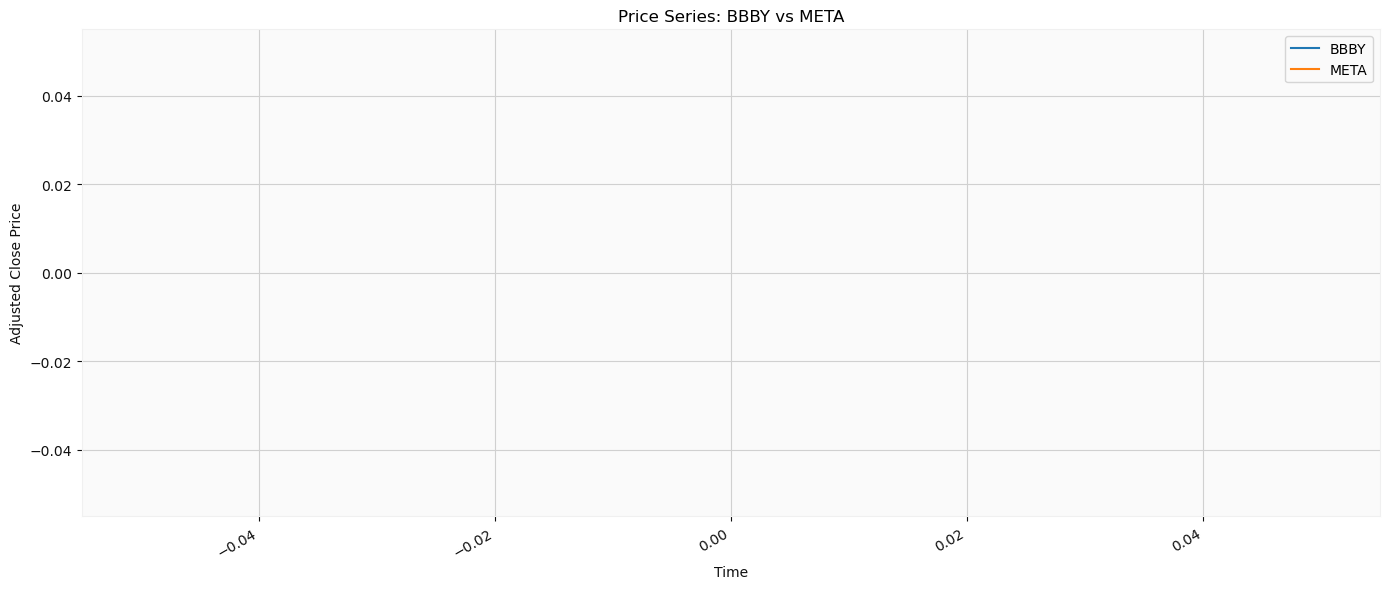

Si desarrollaras una estrategia de comprar la acción que más cae en el último día del S&P500,
es probable que con un dataset sesgado (que solo contiene los activos actuales del S&P500),
te beneficies de resultados de grandes movimientos como el de META, pero no pagues el precio real
como el caso de BBBY, que fue delistada tras una caída fuerte.


In [ ]:


# Definir símbolos y fechas
symbol1 = "BBBY"
symbol2 = "META"
from_date = "2020-01-01"
to_date = "2023-01-01"

# Descargar datos históricos con yfinance
data_bbby = yf.download(symbol1, start=from_date, end=to_date)
data_meta = yf.download(symbol2, start=from_date, end=to_date)

# Mostrar primeras filas para verificar
print(data_bbby.head())
print(data_meta.head())

# Usar la columna 'Adj Close' para análisis (ajustada por splits y dividendos)
bbby_adj = data_bbby['Adj Close']
meta_adj = data_meta['Adj Close']

# Obtener fechas comunes entre ambas series
common_dates = bbby_adj.index.intersection(meta_adj.index)
bbby_adj = bbby_adj.loc[common_dates]
meta_adj = meta_adj.loc[common_dates]

# Combinar en un DataFrame para graficar
df_prices = pd.concat([bbby_adj, meta_adj], axis=1)
df_prices.columns = ['BBBY', 'META']

# Graficar las series
plt.figure(figsize=(14, 6))
df_prices.plot(ax=plt.gca())
plt.title('Price Series: BBBY vs META')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.legend(['BBBY', 'META'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Explicación
print("Si desarrollaras una estrategia de comprar la acción que más cae en el último día del S&P500,")
print("es probable que con un dataset sesgado (que solo contiene los activos actuales del S&P500),")
print("te beneficies de resultados de grandes movimientos como el de META, pero no pagues el precio real")
print("como el caso de BBBY, que fue delistada tras una caída fuerte.")


4. **Primary vs Consolidated Data**  
   Using only primary exchange data may miss trades from other venues.  
   *Use consolidated feeds for a full market view.*

In [ ]:
#EXAMPLE WILL BE PUT HERE

5. **Venue Currency & Market Fragmentation**  
   Data from different venues or currencies may be inconsistent or incomplete.  
   *Ensure currency normalization and use APIs with aggregated data when possible.*

In [ ]:
import ccxt

exchanges = ['binance', 'coinbase', 'kraken']
prices_usd = []

for ex_id in exchanges:
    exchange = getattr(ccxt, ex_id)()
    exchange.load_markets()

    # Algunos exchanges tienen BTC/USDT en vez de BTC/USD
    if 'BTC/USD' in exchange.markets:
        symbol = 'BTC/USD'
        price = exchange.fetch_ticker(symbol)['last']
        prices_usd.append(price)
    elif 'BTC/USDT' in exchange.markets:
        symbol = 'BTC/USDT'
        price = exchange.fetch_ticker(symbol)['last']
        prices_usd.append(price)  # USDT ~ USD
    elif 'BTC/EUR' in exchange.markets:
        symbol = 'BTC/EUR'
        price_eur = exchange.fetch_ticker(symbol)['last']
        # Conversión EUR -> USD (ejemplo fijo, ideal usar API fx real)
        eur_usd = 1.10
        price_usd = price_eur * eur_usd
        prices_usd.append(price_usd)

print("Precios BTC en USD de varios venues:", prices_usd)
print("Precio promedio normalizado:", sum(prices_usd)/len(prices_usd))


Precios BTC en USD de varios venues: [103286.14, 103317.14, 103313.0]
Precio promedio normalizado: 103305.42666666668



6. **Short Sale Restrictions & Illiquidity**  
   Historical restrictions on shorting or low liquidity can skew performance.  
   *Verify shorting availability and minimum liquidity thresholds.*

In [ ]:

# Acciones financieras afectadas por el ban de 2008
tickers = ["AIG", "BAC", "GS", "MS", "C"]

# Parámetros de la estrategia
entry_date = datetime(2008, 10, 9)
exit_date = entry_date + timedelta(days=15)

for ticker in tickers:
    print(f"\n Simulando short en: {ticker}")

    # Descargar datos
    data = yf.download(ticker, start=entry_date.strftime("%Y-%m-%d"), end=exit_date.strftime("%Y-%m-%d"))
    if data.empty:
        print(f" No hay datos para {ticker} en ese periodo.")
        continue

    data = data.reset_index()

    # Precio de entrada
    entry_price = data.loc[0, 'Close']
    sl_price = entry_price * 1.05
    tp_price = entry_price * 0.85

    print(f"Entrada: {entry_price:.2f}, SL: {sl_price:.2f}, TP: {tp_price:.2f}")

    hit_sl = False
    hit_tp = False

    for i, row in data.iterrows():
        close_price = row['Close']
        date = row['Date'].date()

        if close_price >= sl_price:
            print(f"{date} - Hit STOP LOSS at {close_price:.2f}")
            hit_sl = True
            break
        elif close_price <= tp_price:
            print(f"{date} - Hit TAKE PROFIT at {close_price:.2f}")
            hit_tp = True
            break

    if not hit_sl and not hit_tp:
        final_price = data.iloc[-1]['Close']
        print(f"Exit by timeout at {data.iloc[-1]['Date'].date()} - Final Price: {final_price:.2f}")


📉 Simulando short en: AIG


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AIG']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


❌ No hay datos para AIG en ese periodo.

📉 Simulando short en: BAC


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BAC']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


❌ No hay datos para BAC en ese periodo.

📉 Simulando short en: GS


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


❌ No hay datos para GS en ese periodo.

📉 Simulando short en: MS


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


❌ No hay datos para MS en ese periodo.

📉 Simulando short en: C


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['C']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


❌ No hay datos para C en ese periodo.


7. **Futures Continuous Contracts & Adjustment Methods**  
   Creating continuous series may involve back-adjustments that affect signals.  
   *Be consistent with adjustment type (backward/forward/none) and strategy alignment.*

In [ ]:
#EXAMPLE WILL BE PUT HERE

8. **Futures Close Price: Settlement vs Last Traded**  
   Settlement prices may differ from the last traded, impacting daily PnL.  
   *Choose one method consistently and understand its implications for strategy logic.*

In [ ]:
 #EXAMPLE WILL BE PUT HERE

### B. Strategy and Bias Treatments

These relate to **how data is used** in strategy design and backtesting:

---

1. **Look-Ahead Bias**  
   Using future data for decision-making invalidates results.  
   *Always restrict data access to what would be known at each historical point.*

                 time      bid  future_price  signal
0 2022-01-04 23:00:00  1.12847       1.12856       1
1 2022-01-04 23:00:00  1.12845       1.12855       1
2 2022-01-04 23:00:00  1.12842       1.12856       1
3 2022-01-04 23:00:01  1.12842       1.12857       1
4 2022-01-04 23:00:01  1.12843       1.12856       1
5 2022-01-04 23:00:01  1.12842       1.12855       1
6 2022-01-04 23:00:02  1.12841       1.12854       1
7 2022-01-04 23:00:02  1.12842       1.12850       1
8 2022-01-04 23:00:02  1.12841       1.12849       1
9 2022-01-04 23:00:02  1.12842       1.12848       1


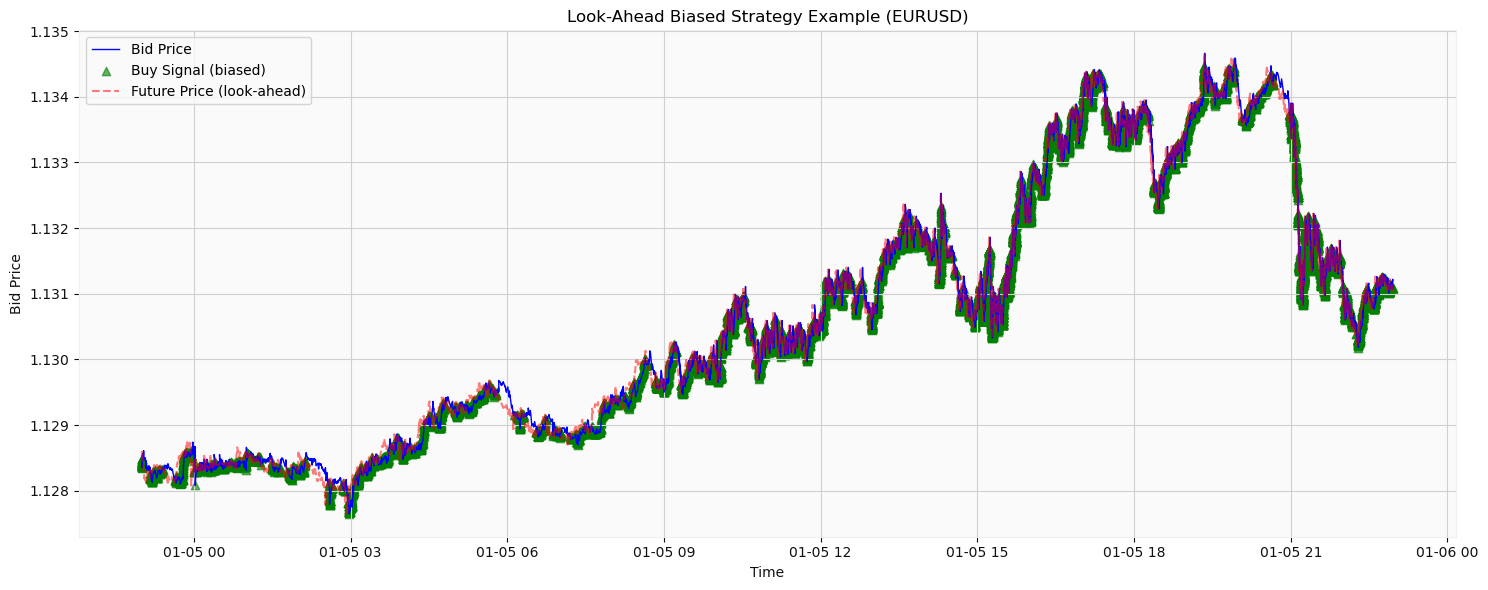

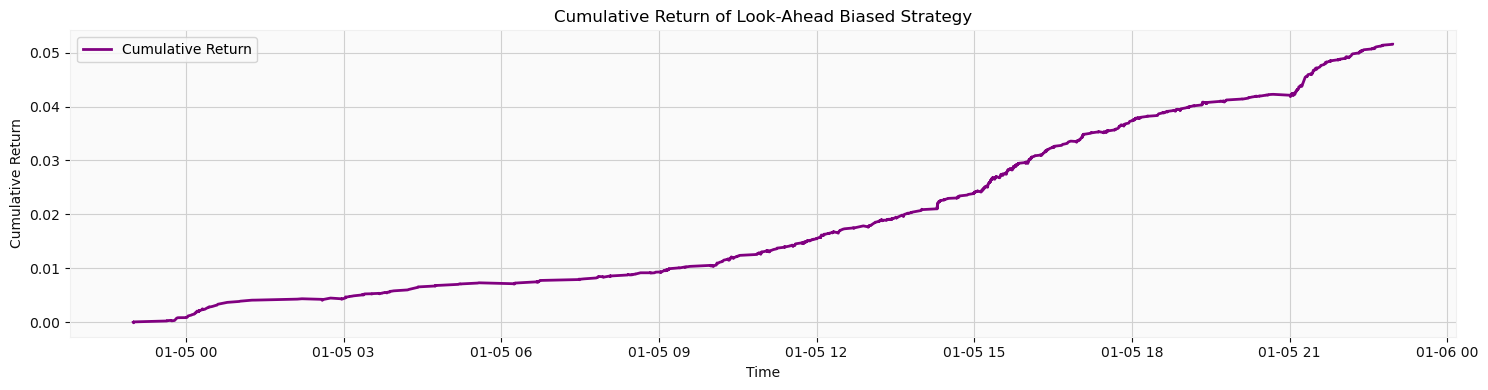

True

In [ ]:

# ===========================================
# Load environment variables from .env file
# ===========================================
# Create a .env file in the same folder and include:
# MT5_LOGIN=12345678
# MT5_PWD=your_password
# This helps protect your credentials.
load_dotenv()

MT5_LOGIN = os.getenv('MT5_LOGIN')
MT5_PWD = os.getenv('MT5_PWD')

# ===========================================
# Initialize and connect to MetaTrader 5
# ===========================================
mt5.initialize()

# Log in to your MT5 account (make sure MetaTrader 5 is running and connected)
# Replace 'MetaQuotes-Demo' with your broker's server if needed
mt5.login(int(MT5_LOGIN), MT5_PWD, 'MetaQuotes-Demo')


# === Rango de tiempo ===
from_date = datetime(2022, 1, 5)
to_date = datetime(2022, 1, 6)

# === Descargar datos de ticks (EURUSD) ===
ticks = mt5.copy_ticks_range("EURUSD", from_date, to_date, mt5.COPY_TICKS_ALL)

# === Convertir a DataFrame ===
data = pd.DataFrame(ticks)
data.head()
data['time'] = pd.to_datetime(data['time'], unit='s')

# Usar solo precios de compra (bid)
data = data[['time', 'bid']].copy()

# === Crear señal basada en el FUTURO (Look-Ahead Bias) ===
# Compro si el precio 10 segundos después es más alto
data['future_price'] = data['bid'].shift(-100)  # Suponiendo 10 ticks por segundo
data['signal'] = (data['future_price'] > data['bid']).astype(int)

data['next_bid'] = data['bid'].shift(-1)

data['return'] = [
    next_bid - bid if signal == 1 else 0
    for next_bid, bid, signal in zip(data['next_bid'], data['bid'], data['signal'])
]
# === Mostrar datos con bias ===
print(data[['time', 'bid', 'future_price', 'signal']].head(10))

# Eliminar filas con NaNs (por el shift negativo)
plot_data = data.dropna().copy()

# Crear gráfico
plt.figure(figsize=(15, 6))
plt.plot(plot_data['time'], plot_data['bid'], label='Bid Price', color='blue', linewidth=1)

# Marcar señales de compra (con bias)
buy_signals = plot_data[plot_data['signal'] == 1]
plt.scatter(buy_signals['time'], buy_signals['bid'], color='green', marker='^', label='Buy Signal (biased)', alpha=0.6)

# (Opcional) Dibujar línea de futuro precio
plt.plot(plot_data['time'], plot_data['future_price'], label='Future Price (look-ahead)', color='red', linestyle='--', alpha=0.5)

# Etiquetas y leyenda
plt.title('Look-Ahead Biased Strategy Example (EURUSD)')
plt.xlabel('Time')
plt.ylabel('Bid Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


plot_data['cumulative_return'] = plot_data['return'].cumsum()

plt.figure(figsize=(15, 4))
plt.plot(plot_data['time'], plot_data['cumulative_return'], color='purple', linewidth=2, label='Cumulative Return')
plt.title('Cumulative Return of Look-Ahead Biased Strategy')
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

mt5.shutdown()


2. **Data Snooping Bias**  
   Overfitting results by testing many strategies on the same dataset.  
   *Use out-of-sample testing, cross-validation, and penalize complexity.*


Total invertido: $18435.63
Valor final (vendido todo a $196.90): $32094.70
Retorno total: 74.09%


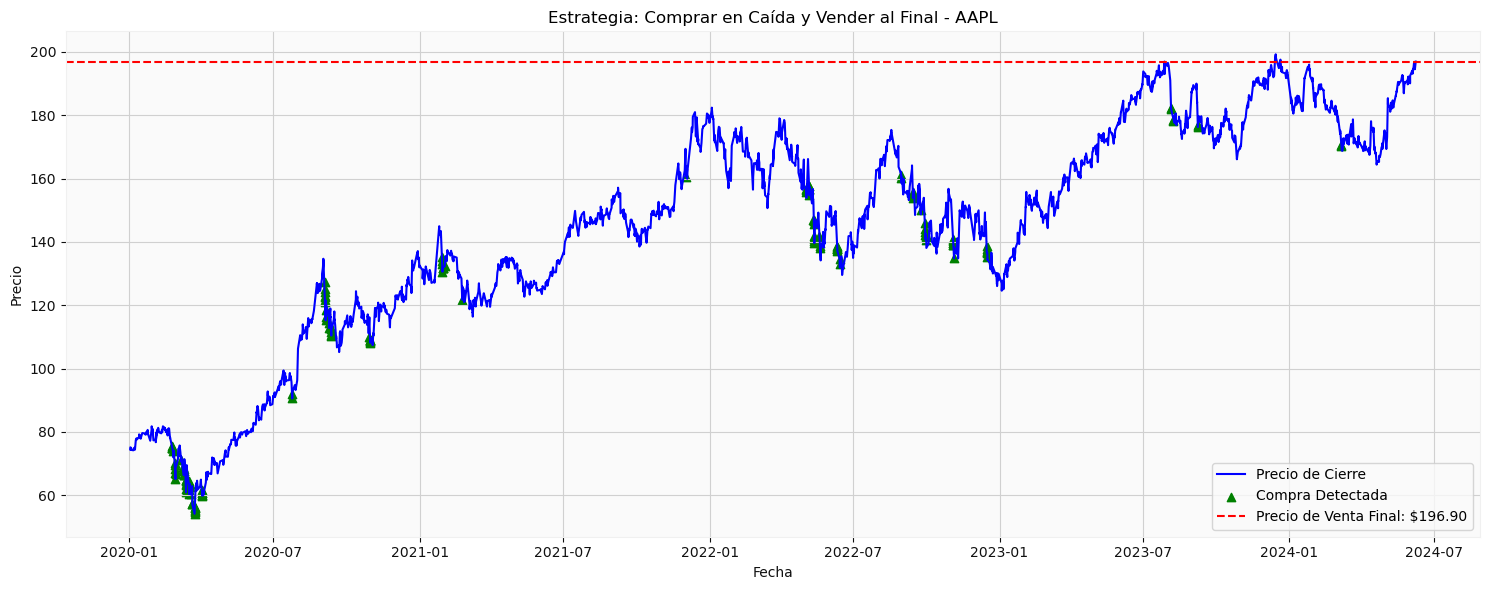

True

In [ ]:
import MetaTrader5 as mt5
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
from dotenv import load_dotenv

# === Cargar credenciales ===
load_dotenv()
MT5_LOGIN = os.getenv('MT5_LOGIN')
MT5_PWD = os.getenv('MT5_PWD')

# === Inicializar MT5 ===
mt5.initialize()
mt5.login(int(MT5_LOGIN), MT5_PWD, 'MetaQuotes-Demo')

# === Rango de tiempo ===
from_date = datetime(2020, 1, 1)
to_date = datetime(2024, 6, 10)

# === Descargar datos OHLC de AAPL (1 hora) ===
rates = mt5.copy_rates_range("AAPL", mt5.TIMEFRAME_H1, from_date, to_date)
data = pd.DataFrame(rates)
data['time'] = pd.to_datetime(data['time'], unit='s')

# === Parámetros ===
drop_threshold_pct = 5  # Porcentaje de caída desde el máximo
rolling_window = 10     # Número de velas para calcular el máximo

# === Calcular máximo reciente y % de caída ===
data['rolling_max'] = data['close'].rolling(window=rolling_window, min_periods=1).max()
data['drop_pct'] = 100 * (data['rolling_max'] - data['close']) / data['rolling_max']
data['buy_signal'] = data['drop_pct'] > drop_threshold_pct

# === Filtrar señales de compra ===
buy_signals = data[data['buy_signal']].copy()
buy_prices = buy_signals['close'].values

# === Precio de venta final ===
final_price = data['close'].iloc[-1]
num_shares = len(buy_prices)

# === Cálculo del retorno ===
if num_shares > 0:
    total_invested = buy_prices.sum()
    total_value = num_shares * final_price
    total_return = (total_value - total_invested) / total_invested
    print(f"\nTotal invertido: ${total_invested:.2f}")
    print(f"Valor final (vendido todo a ${final_price:.2f}): ${total_value:.2f}")
    print(f"Retorno total: {total_return * 100:.2f}%")
else:
    print("No se ejecutaron compras. No hay retorno.")

# === Plot de precios y compras ===
plt.figure(figsize=(15, 6))
plt.plot(data['time'], data['close'], label='Precio de Cierre', color='blue')
plt.scatter(buy_signals['time'], buy_signals['close'], color='green', marker='^', label='Compra Detectada')
plt.axhline(y=final_price, color='red', linestyle='--', label=f'Precio de Venta Final: ${final_price:.2f}')
plt.title('Estrategia: Comprar en Caída y Vender al Final - AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

mt5.shutdown()




3. **Strategy vs Long-Only Strategy**  
   Biases may affect long/short and long-only strategies differently.  
   *Compare both variants to evaluate robustness and detect overfitting.*

Compra: 2020-01-02 16:00:00 a $74.49
Venta:  2024-06-07 22:00:00 a $196.90
Retorno total: 164.33%


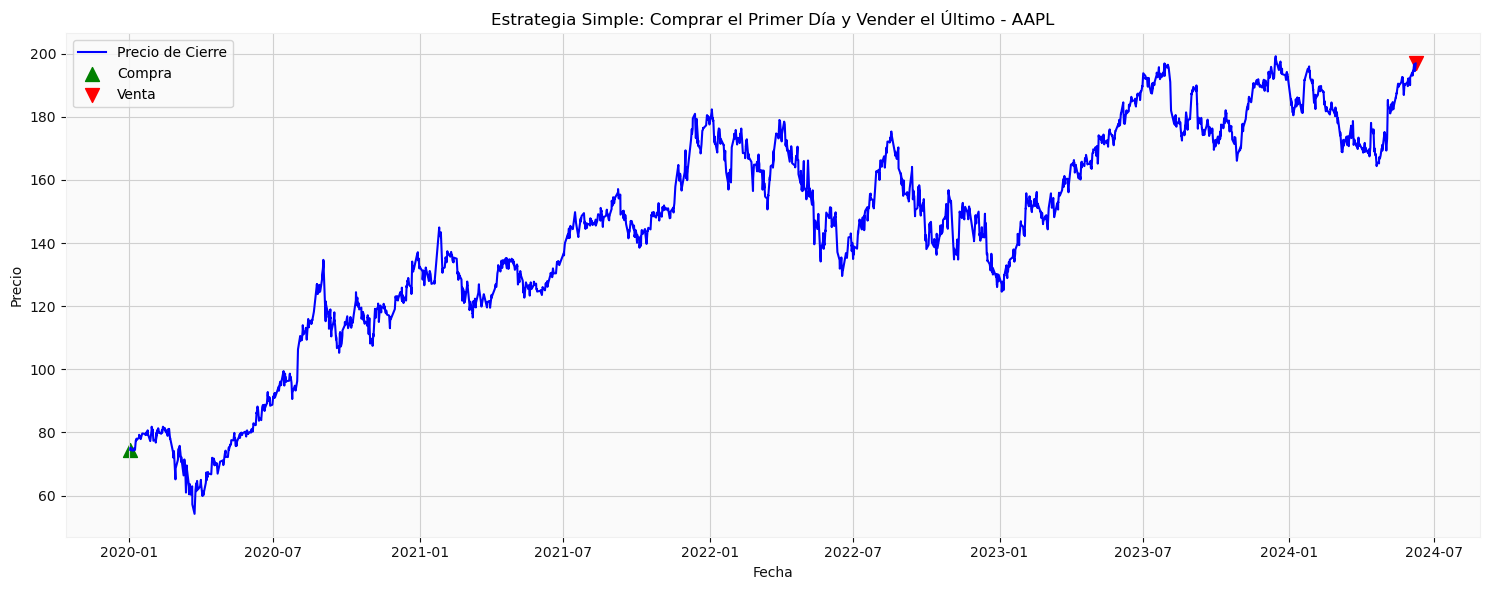

True

In [ ]:
#EXAMPLE WILL BE PUT HERE

import MetaTrader5 as mt5
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
from dotenv import load_dotenv

# === Cargar credenciales ===
load_dotenv()
MT5_LOGIN = os.getenv('MT5_LOGIN')
MT5_PWD = os.getenv('MT5_PWD')

# === Inicializar MT5 ===
mt5.initialize()
mt5.login(int(MT5_LOGIN), MT5_PWD, 'MetaQuotes-Demo')

# === Rango de tiempo ===
from_date = datetime(2020, 1, 1)
to_date = datetime(2024, 6, 10)

# === Descargar datos OHLC de AAPL (1 hora) ===
rates = mt5.copy_rates_range("AAPL", mt5.TIMEFRAME_H1, from_date, to_date)
data = pd.DataFrame(rates)
data['time'] = pd.to_datetime(data['time'], unit='s')

# === Asegurarse de que hay suficientes datos ===
if data.empty or len(data) < 2:
    print("No hay suficientes datos para ejecutar la estrategia.")
    mt5.shutdown()
    exit()

# === Seleccionar compra y venta ===
buy_time = data.iloc[0]['time']
buy_price = data.iloc[0]['close']
sell_time = data.iloc[-1]['time']
sell_price = data.iloc[-1]['close']

# === Calcular retorno ===
total_return = (sell_price - buy_price) / buy_price

# === Imprimir resultados ===
print(f"Compra: {buy_time} a ${buy_price:.2f}")
print(f"Venta:  {sell_time} a ${sell_price:.2f}")
print(f"Retorno total: {total_return * 100:.2f}%")

# === Graficar compra y venta ===
plt.figure(figsize=(15, 6))
plt.plot(data['time'], data['close'], label='Precio de Cierre', color='blue')
plt.scatter([buy_time], [buy_price], color='green', marker='^', s=100, label='Compra')
plt.scatter([sell_time], [sell_price], color='red', marker='v', s=100, label='Venta')
plt.title('Estrategia Simple: Comprar el Primer Día y Vender el Último - AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

mt5.shutdown()
